In [41]:
from IPython import get_ipython
ipython = get_ipython()
ipython.magic('load_ext autoreload')
ipython.magic('autoreload 2')

import os
import sys
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial.distance as sdst
#
sys.path.append('../../..')
from biodl.bio_utils import parallel_tasks_run_def
from biodl.deephd.dhd_data import _load_idx
import logging
logging.basicConfig(level=logging.INFO)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
path_idx = '/mnt/data1T/data/annaha/homod/idxok.txt'
data_idx = _load_idx(path_idx)

In [64]:
def _calc_dst_cacb(data: dict):
    x1 = data['coords_ca']
    x2 = data['coords_cb']
    data['dst_pw_ca'] = sdst.cdist(x1[0], x1[1]).astype(np.float32)
    data['dst_pw_cb'] = sdst.cdist(x2[0], x2[1]).astype(np.float32)
    return data

def _load_data(row: pd.Series) -> dict:
    data = pkl.load(open(row['path_cacb_abs'], 'rb'))
    data = _calc_dst_cacb(data)
    sasa = pd.DataFrame(data={f'rad{x}': pd.read_csv(row['path_sasa_abs'].format(x))['score'].values for x in (3, 4, 5, 7)})
    return {
        'cacb': data,
        'sasa': sasa
    }

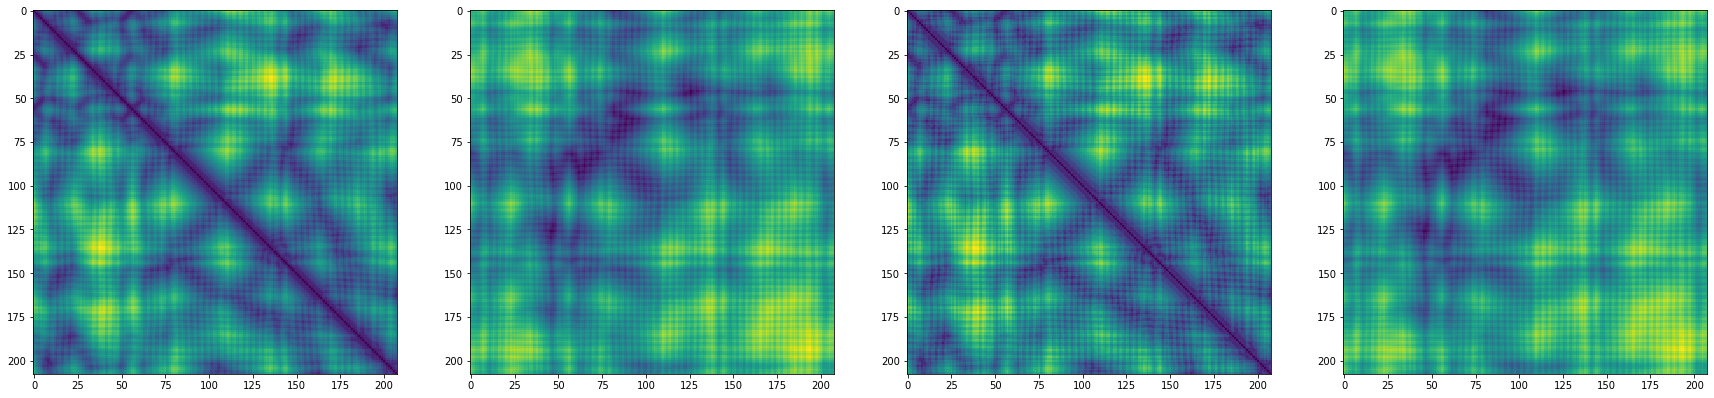

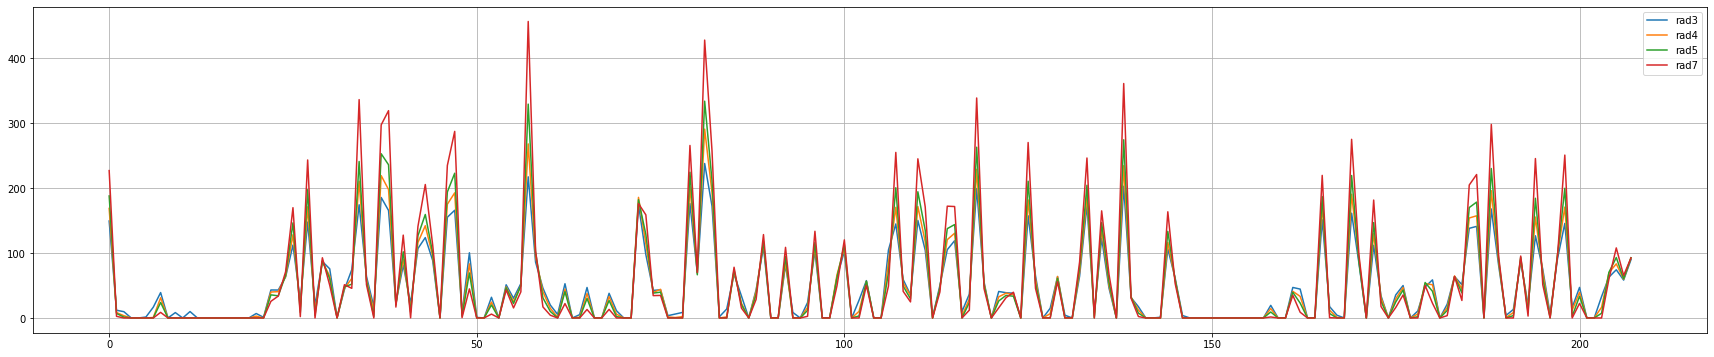

In [71]:
row = data_idx.iloc[0]
q = _load_data(row)
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(q['cacb']['dst_ca'][0].astype(np.float32))
plt.subplot(1, 4, 2)
plt.imshow(q['cacb']['dst_pw_ca'])
plt.subplot(1, 4, 3)
plt.imshow(q['cacb']['dst_cb'][0].astype(np.float32))
plt.subplot(1, 4, 4)
plt.imshow(q['cacb']['dst_pw_ca'])
#
plt.figure(figsize=(30, 6))
plt.plot(q['sasa'])
plt.legend(q['sasa'].keys())
plt.grid()

In [77]:
import torch
from torch import nn

In [ ]:
nn.